# MODEL LSTM EXPERIMENT 7
### batch_size = 32, 64, 128, 256
### epochs = 10, 20, 30, 40, 50
### optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
### learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
### activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

### tune_parameter1 = [{batch_size: 64, epochs: 30, optimizer: Adam, learn_rate: 0.01, activation: sigmoid}]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

palette=sns.color_palette('magma')
sns.set(palette=palette)

In [3]:
data = pd.read_excel("../../../../../Preprocessing/data_clean.xlsx", index_col=0)

data.head()

,userName,review,Sentimen,review_tokenize,review_normalized,review_stemmed,review_stopwords,review_clean
0,Della Nis94,waktu blm di upgrade ataupun udah upgrade sama...,0,"['waktu', 'blm', 'di', 'upgrade', 'ataupun', '...","['waktu', 'belum', 'di', 'upgrade', 'ataupun',...","['waktu', 'belum', 'di', 'upgrade', 'atau', 's...","['waktu', 'upgrade', 'upgrade', 'sama', 'ajama...",waktu upgrade upgrade sama ajamau daftar antri...
1,Jakarta Review,kirim kode verifikasi email gak masuk sampe s...,0,"['kirim', 'kode', 'verifikasi', 'email', 'gak'...","['kirim', 'kode', 'verifikasi', 'email', 'engg...","['kirim', 'kode', 'verifikasi', 'email', 'engg...","['kirim', 'kode', 'verifikasi', 'email', 'engg...",kirim kode verifikasi email enggak masuk engga...
2,Shasha Rose,saya minta verifikasi sampe kali gagal terus...,0,"['saya', 'minta', 'verifikasi', 'sampe', 'kali...","['saya', 'meminta', 'verifikasi', 'sampai', 'k...","['saya', 'minta', 'verifikasi', 'sampai', 'kal...","['minta', 'verifikasi', 'kali', 'gagal', 'nomo...",minta verifikasi kali gagal nomor ktpnama foto...
3,Kris Panji Mukti,tolong perbaiki masalah untuk pendaftaran vaks...,0,"['tolong', 'perbaiki', 'masalah', 'untuk', 'pe...","['tolong', 'perbaiki', 'masalah', 'untuk', 'pe...","['tolong', 'baik', 'masalah', 'untuk', 'daftar...","['baik', 'masalah', 'daftar', 'vaksin', 'nomor...",baik masalah daftar vaksin nomor ktp nama sesu...
4,Dwi Wiharti,saya sudah daftar untuk vaksin booster moderna...,0,"['saya', 'sudah', 'daftar', 'untuk', 'vaksin',...","['saya', 'sudah', 'daftar', 'untuk', 'vaksin',...","['saya', 'sudah', 'daftar', 'untuk', 'vaksin',...","['daftar', 'vaksin', 'booster', 'moderna', 'la...",daftar vaksin booster moderna lalu aplikasi ja...


In [4]:
data['review_clean'] = data['review_clean'].astype(str)

In [5]:
print(data.dtypes)

userName             object
review               object
Sentimen              int64
review_tokenize      object
review_normalized    object
review_stemmed       object
review_stopwords     object
review_clean         object
dtype: object


# Analisis Data

In [6]:
# Menghitung jumlah data sentimen
data['Sentimen'].value_counts()

0    991
1    989
Name: Sentimen, dtype: int64

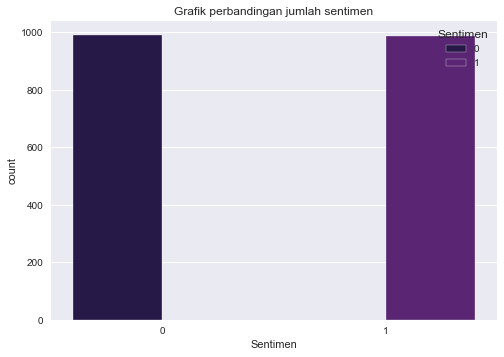

<Figure size 720x720 with 0 Axes>

In [7]:
# Visualisasi perbandingan jumlah source review

plt.style.use("seaborn")
plt.title("Grafik perbandingan jumlah sentimen")
sns.countplot(x="Sentimen", hue="Sentimen", data=data, palette=palette)
plt.figure(figsize=(10, 10))
plt.show()

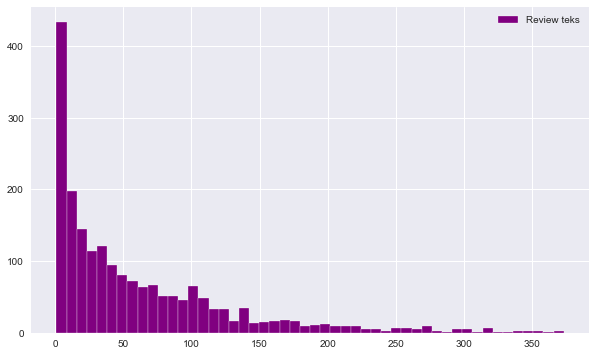

In [8]:
# Melihat panjang teks dalam data
length_data = data['review_clean'].str.len()
plt.style.use("seaborn")
plt.figure(figsize=(10, 6))
plt.hist(length_data, bins=50, label="Review teks", color="purple")
plt.legend()

In [9]:
from PIL import Image
import numpy as np

mask = np.array(Image.open('./mapjkt-pattern.jpg'))

In [10]:
#Visualisasi teks review dengan wordcloud
def word_cloud(words, colorMap):
  word_cloud = WordCloud(colormap=colorMap, mask=mask, 
                         width=1000, height=1000, mode='RGBA', 
                         background_color='white').generate(words)
  plt.figure(figsize=(20,10))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")

In [11]:
all_words = ' '.join([word for word in data["review_clean"]])

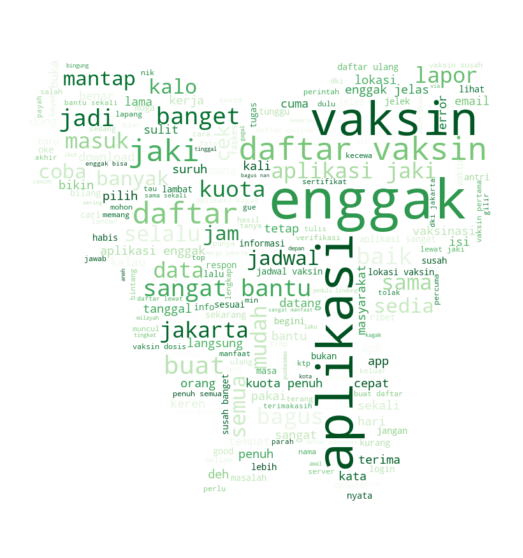

In [12]:
word_cloud(all_words, 'Greens')

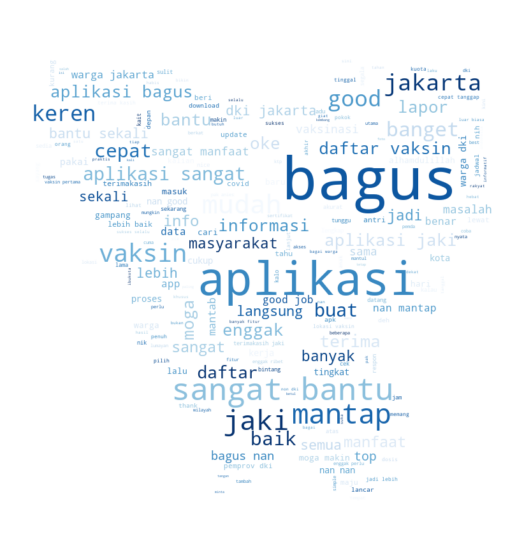

In [13]:
# ULASAN POSITIF
word_positif = data[data['Sentimen'] == 1]
word_positif = ' '.join(word for word in word_positif["review_clean"])

word_cloud(word_positif, 'Blues')

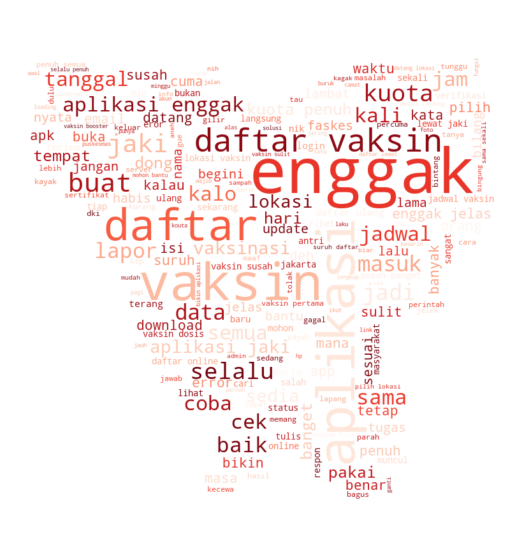

In [14]:
# ULASAN NEGATIF
word_negatif = data[data['Sentimen'] == 0]
word_negatif = ' '.join(word for word in word_negatif["review_clean"])

word_cloud(word_negatif, 'Reds')

# Split data training and testing

In [15]:
X = data['review_clean'].values
Y = data['Sentimen'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
random_state=0)

# Tokenization & Padding

In [16]:
# lakukan tokenisasi dan gunakan fungsi pad_sequence agar setiap sequence sama panjang 
tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)
 
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
 
padded_train = pad_sequences(sequences_train, maxlen=60) 
padded_test = pad_sequences(sequences_test, maxlen=60)

In [17]:
print(padded_train.shape,padded_test.shape) 

(1584, 60) (396, 60)


In [18]:
print(tokenizer.word_index)

{'-': 1, 'vaksin': 2, 'aplikasi': 3, 'enggak': 4, 'daftar': 5, 'jaki': 6, 'sangat': 7, 'bantu': 8, 'bagus': 9, 'kuota': 10, 'buat': 11, 'penuh': 12, 'banget': 13, 'lokasi': 14, 'baik': 15, 'jakarta': 16, 'jadi': 17, 'lapor': 18, 'selalu': 19, 'semua': 20, 'jadwal': 21, 'mantap': 22, 'sama': 23, 'masuk': 24, 'mudah': 25, 'susah': 26, 'data': 27, 'good': 28, 'jelas': 29, 'vaksinasi': 30, 'sekali': 31, 'banyak': 32, 'tanggal': 33, 'nan': 34, 'kalo': 35, 'pilih': 36, 'dki': 37, 'cek': 38, 'kali': 39, 'tempat': 40, 'terima': 41, 'datang': 42, 'jam': 43, 'cepat': 44, 'pakai': 45, 'coba': 46, 'sedia': 47, 'bikin': 48, 'sulit': 49, 'hari': 50, 'suruh': 51, 'lebih': 52, 'nik': 53, 'download': 54, 'keren': 55, 'dong': 56, 'sesuai': 57, 'email': 58, 'lewat': 59, 'ulang': 60, 'warga': 61, 'orang': 62, 'langsung': 63, 'benar': 64, 'tetap': 65, 'nama': 66, 'isi': 67, 'kata': 68, 'waktu': 69, 'online': 70, 'cuma': 71, 'kalau': 72, 'apk': 73, 'lama': 74, 'pertama': 75, 'deh': 76, 'mohon': 77, 'habis':

# TF-IDF

In [19]:
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf= True, use_idf= True)

In [20]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(1584, 430)
(396, 430)


In [21]:
# Untuk mengetahui panjang/jumldah data pada x_train , x_test, y_train, y_test
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1584, 430) (1584,)
Test set: (396, 430) (396,)


In [22]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [23]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Modeling

In [24]:
def config_model():
    return tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=512, input_length=60),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [25]:
import tensorflow as tf
from keras.metrics import Precision, Recall
tf.keras.backend.clear_session()
model = config_model()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 512)           2560000   
                                                                 
 lstm (LSTM)                 (None, 64)                147712    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,708,769
Trainable params: 2,708,769
Non-

In [26]:
num_epochs = 30
batch_size = 64

history = model.fit(padded_train, y_train, batch_size=batch_size, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 13s - loss: 0.3897 - accuracy: 0.8295 - val_loss: 0.2510 - val_accuracy: 0.9318 - 13s/epoch - 507ms/step
Epoch 2/30
25/25 - 9s - loss: 0.1175 - accuracy: 0.9691 - val_loss: 0.2358 - val_accuracy: 0.9343 - 9s/epoch - 376ms/step
Epoch 3/30
25/25 - 9s - loss: 0.0401 - accuracy: 0.9886 - val_loss: 0.3616 - val_accuracy: 0.9318 - 9s/epoch - 374ms/step
Epoch 4/30
25/25 - 8s - loss: 0.0294 - accuracy: 0.9918 - val_loss: 0.4509 - val_accuracy: 0.9293 - 8s/epoch - 305ms/step
Epoch 5/30
25/25 - 7s - loss: 0.0219 - accuracy: 0.9962 - val_loss: 0.5318 - val_accuracy: 0.9343 - 7s/epoch - 296ms/step
Epoch 6/30
25/25 - 7s - loss: 0.0116 - accuracy: 0.9924 - val_loss: 0.5801 - val_accuracy: 0.9167 - 7s/epoch - 289ms/step
Epoch 7/30
25/25 - 7s - loss: 0.0123 - accuracy: 0.9956 - val_loss: 0.5229 - val_accuracy: 0.9167 - 7s/epoch - 283ms/step
Epoch 8/30
25/25 - 8s - loss: 0.0139 - accuracy: 0.9924 - val_loss: 0.5593 - val_accuracy: 0.9343 - 8s/epoch - 315ms/step
Epoch 9/30
25/25 - 7s 

In [27]:
scores = model.evaluate(padded_test, y_test, verbose=1)

13/13 [==============================] - 0s 24ms/step - loss: 0.8832 - accuracy: 0.9318


# Evaluasi

In [28]:
y_pred = np.where(model.predict(padded_test)>.5,1,0)

In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score

print('Recall: {}'.format(recall_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('F1-score: {}'.format(f1_score(y_test, y_pred)))

Recall: 0.925
Precision score: 0.9390862944162437
F1-score: 0.9319899244332494


In [30]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       199
           1       0.93      0.94      0.93       197

    accuracy                           0.93       396
   macro avg       0.93      0.93      0.93       396
weighted avg       0.93      0.93      0.93       396



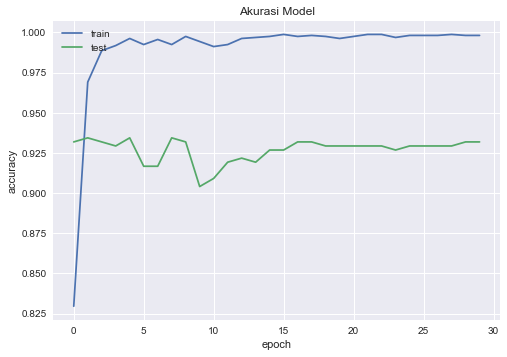

In [31]:
# plot akurasi dari model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

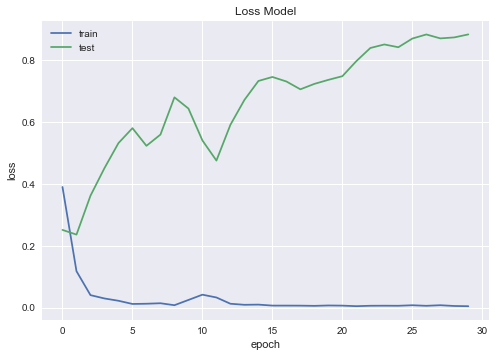

In [32]:
# plot loss dari model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
def flatten(xss):
    return [x for xs in xss for x in xs]

y_pred_flatten = flatten(y_pred)
y_pred_flatten = np.array(y_pred_flatten)

<AxesSubplot:>

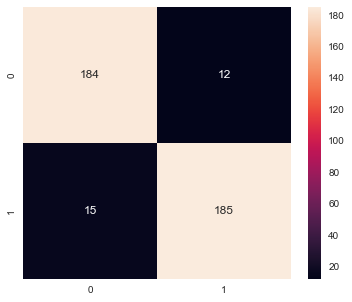

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_flatten), annot = True, fmt='g')

In [35]:
# LSTM Model Test and validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

kfold =  StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []

X = data['review_clean'].values
Y = data['Sentimen'].values

for train, test in kfold.split(X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
    random_state=0)
    
    tokenizer = Tokenizer(num_words=5000, oov_token='-')
    tokenizer.fit_on_texts(x_train)
    tokenizer.fit_on_texts(x_test)

    sequences_train = tokenizer.texts_to_sequences(x_train)
    sequences_test = tokenizer.texts_to_sequences(x_test)

    padded_train = pad_sequences(sequences_train, maxlen=60) 
    padded_test = pad_sequences(sequences_test, maxlen=60)
    
    tf.keras.backend.clear_session()
    model = config_model()
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    history = model.fit(padded_train, y_train, batch_size=batch_size, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)
    
    scores = model.evaluate(padded_test, y_test, verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/30
25/25 - 20s - loss: 0.4194 - accuracy: 0.8119 - val_loss: 0.2179 - val_accuracy: 0.9242 - 20s/epoch - 788ms/step
Epoch 2/30
25/25 - 8s - loss: 0.1375 - accuracy: 0.9697 - val_loss: 0.2284 - val_accuracy: 0.9369 - 8s/epoch - 307ms/step
Epoch 3/30
25/25 - 9s - loss: 0.0731 - accuracy: 0.9880 - val_loss: 0.2673 - val_accuracy: 0.9318 - 9s/epoch - 341ms/step
Epoch 4/30
25/25 - 8s - loss: 0.0381 - accuracy: 0.9956 - val_loss: 0.4131 - val_accuracy: 0.9394 - 8s/epoch - 325ms/step
Epoch 5/30
25/25 - 8s - loss: 0.0379 - accuracy: 0.9943 - val_loss: 0.3712 - val_accuracy: 0.9444 - 8s/epoch - 317ms/step
Epoch 6/30
25/25 - 8s - loss: 0.0498 - accuracy: 0.9899 - val_loss: 0.3469 - val_accuracy: 0.9419 - 8s/epoch - 304ms/step
Epoch 7/30
25/25 - 8s - loss: 0.0289 - accuracy: 0.9962 - val_loss: 0.3885 - val_accuracy: 0.9318 - 8s/epoch - 307ms/step
Epoch 8/30
25/25 - 7s - loss: 0.0174 - accuracy: 0.9981 - val_loss: 0.4730 - val_accuracy: 0.9394 - 7s/epoch - 297ms/step
Epoch 9/30
25/25 - 8s 

Epoch 6/30
25/25 - 7s - loss: 0.0312 - accuracy: 0.9956 - val_loss: 0.5979 - val_accuracy: 0.9268 - 7s/epoch - 281ms/step
Epoch 7/30
25/25 - 7s - loss: 0.0197 - accuracy: 0.9968 - val_loss: 0.5859 - val_accuracy: 0.9192 - 7s/epoch - 274ms/step
Epoch 8/30
25/25 - 7s - loss: 0.0270 - accuracy: 0.9943 - val_loss: 0.5664 - val_accuracy: 0.9192 - 7s/epoch - 284ms/step
Epoch 9/30
25/25 - 8s - loss: 0.0290 - accuracy: 0.9931 - val_loss: 0.6242 - val_accuracy: 0.9268 - 8s/epoch - 319ms/step
Epoch 10/30
25/25 - 8s - loss: 0.0189 - accuracy: 0.9949 - val_loss: 0.6653 - val_accuracy: 0.9318 - 8s/epoch - 305ms/step
Epoch 11/30
25/25 - 7s - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.6794 - val_accuracy: 0.9369 - 7s/epoch - 299ms/step
Epoch 12/30
25/25 - 8s - loss: 0.0124 - accuracy: 0.9981 - val_loss: 0.6859 - val_accuracy: 0.9293 - 8s/epoch - 306ms/step
Epoch 13/30
25/25 - 8s - loss: 0.0091 - accuracy: 0.9981 - val_loss: 0.7057 - val_accuracy: 0.9343 - 8s/epoch - 310ms/step
Epoch 14/30
25/25 - 

25/25 - 8s - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.8144 - val_accuracy: 0.9343 - 8s/epoch - 322ms/step
Epoch 12/30
25/25 - 8s - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.8392 - val_accuracy: 0.9369 - 8s/epoch - 329ms/step
Epoch 13/30
25/25 - 8s - loss: 0.0075 - accuracy: 0.9968 - val_loss: 0.8556 - val_accuracy: 0.9318 - 8s/epoch - 322ms/step
Epoch 14/30
25/25 - 8s - loss: 0.0041 - accuracy: 0.9981 - val_loss: 0.9040 - val_accuracy: 0.9318 - 8s/epoch - 327ms/step
Epoch 15/30
25/25 - 8s - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.9463 - val_accuracy: 0.9318 - 8s/epoch - 337ms/step
Epoch 16/30
25/25 - 8s - loss: 0.0068 - accuracy: 0.9962 - val_loss: 0.9569 - val_accuracy: 0.9318 - 8s/epoch - 322ms/step
Epoch 17/30
25/25 - 8s - loss: 0.0047 - accuracy: 0.9968 - val_loss: 0.9614 - val_accuracy: 0.9318 - 8s/epoch - 323ms/step
Epoch 18/30
25/25 - 8s - loss: 0.0049 - accuracy: 0.9975 - val_loss: 0.9872 - val_accuracy: 0.9318 - 8s/epoch - 327ms/step
Epoch 19/30
25/25 - 8s - los

Epoch 17/30
25/25 - 7s - loss: 0.0054 - accuracy: 0.9975 - val_loss: 1.0258 - val_accuracy: 0.9343 - 7s/epoch - 284ms/step
Epoch 18/30
25/25 - 7s - loss: 0.0059 - accuracy: 0.9975 - val_loss: 1.0387 - val_accuracy: 0.9318 - 7s/epoch - 294ms/step
Epoch 19/30
25/25 - 7s - loss: 0.0044 - accuracy: 0.9975 - val_loss: 1.0778 - val_accuracy: 0.9369 - 7s/epoch - 292ms/step
Epoch 20/30
25/25 - 7s - loss: 0.0055 - accuracy: 0.9981 - val_loss: 1.0989 - val_accuracy: 0.9343 - 7s/epoch - 286ms/step
Epoch 21/30
25/25 - 7s - loss: 0.0046 - accuracy: 0.9981 - val_loss: 1.1102 - val_accuracy: 0.9343 - 7s/epoch - 282ms/step
Epoch 22/30
25/25 - 7s - loss: 0.0064 - accuracy: 0.9962 - val_loss: 1.1377 - val_accuracy: 0.9369 - 7s/epoch - 284ms/step
Epoch 23/30
25/25 - 7s - loss: 0.0042 - accuracy: 0.9994 - val_loss: 1.1391 - val_accuracy: 0.9318 - 7s/epoch - 288ms/step
Epoch 24/30
25/25 - 7s - loss: 0.0034 - accuracy: 0.9987 - val_loss: 1.1624 - val_accuracy: 0.9343 - 7s/epoch - 283ms/step
Epoch 25/30
25/2

Epoch 22/30
25/25 - 7s - loss: 0.0091 - accuracy: 0.9987 - val_loss: 0.8987 - val_accuracy: 0.9343 - 7s/epoch - 275ms/step
Epoch 23/30
25/25 - 7s - loss: 0.0080 - accuracy: 0.9987 - val_loss: 0.9270 - val_accuracy: 0.9343 - 7s/epoch - 271ms/step
Epoch 24/30
25/25 - 7s - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.9356 - val_accuracy: 0.9343 - 7s/epoch - 272ms/step
Epoch 25/30
25/25 - 6s - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.9124 - val_accuracy: 0.9343 - 6s/epoch - 251ms/step
Epoch 26/30
25/25 - 3s - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.9848 - val_accuracy: 0.9318 - 3s/epoch - 134ms/step
Epoch 27/30
25/25 - 3s - loss: 0.0071 - accuracy: 0.9987 - val_loss: 1.0198 - val_accuracy: 0.9318 - 3s/epoch - 130ms/step
Epoch 28/30
25/25 - 3s - loss: 0.0070 - accuracy: 0.9987 - val_loss: 1.0314 - val_accuracy: 0.9318 - 3s/epoch - 132ms/step
Epoch 29/30
25/25 - 3s - loss: 0.0061 - accuracy: 0.9994 - val_loss: 1.0372 - val_accuracy: 0.9318 - 3s/epoch - 133ms/step
Epoch 30/30
25/2